# **Esercizio Machine Learning**

Utilizzando il dataset "Iris" disponibile in scikit-learn, applica l'algoritmo KMeans per raggruppare i campioni e confronta i cluster ottenuti con le etichette originali delle specie di iris.


1. Carica il dataset "Digits" utilizzando sklearn.datasets.load_digits()

In [2]:
from sklearn.datasets import load_digits
data = load_digits()
X = data.data 
y=data.target

2. Esplora i dati per comprendere la struttura delle immagini e le etichette associate.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.DataFrame(X, columns=data.feature_names)
# df['target'] = y

In [20]:
df.size

115008

In [21]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [15]:
def visualizzazioneimmagine(matrice):    
    plt.imshow(matrice, cmap='gray', vmin=-10, vmax=10)
    plt.colorbar()
    plt.title("Immagine generata dalla matrice di grigi")
    plt.show()

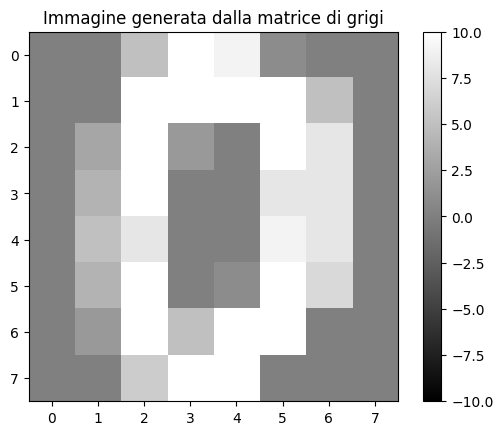

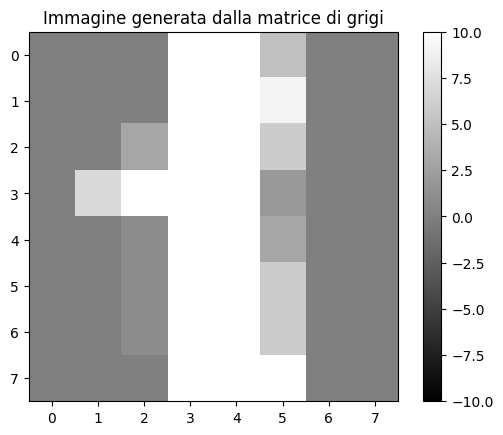

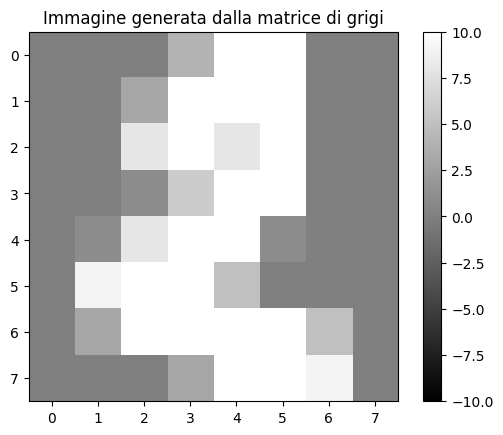

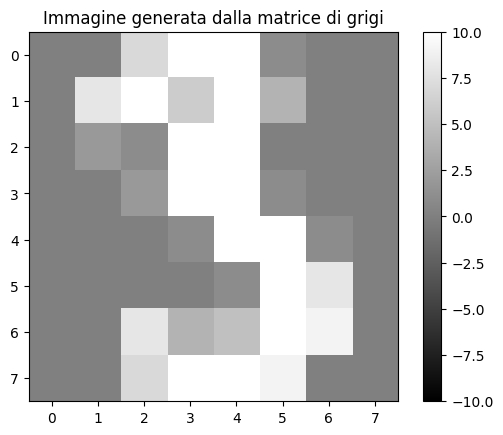

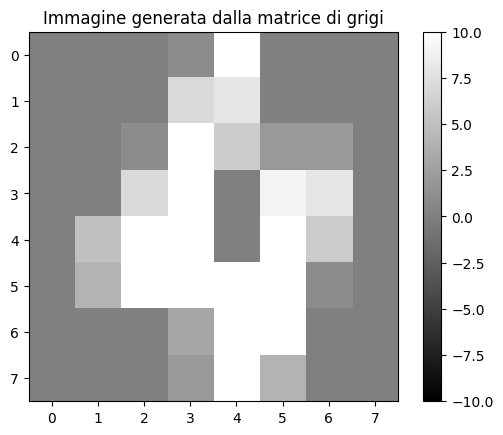

In [16]:
for im in df.head(5).to_numpy():
    immagine=im.reshape(8,8)
    visualizzazioneimmagine(immagine)


3. Applica PCA per ridurre i dati da 64 dimensioni (8x8 pixel) a 2 dimensioni.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [34]:
print(X_pca)

[[-1.91421366 -0.95450157]
 [-0.58898033  0.9246358 ]
 [-1.30203906 -0.31718883]
 ...
 [-1.02259599 -0.14791087]
 [-1.07605522 -0.38090625]
 [ 1.25770233 -2.22759088]]


`X_pca[:,0]`: valori della prima dimensione principale

`X_pca[:,1]`: valori della seconda dimensione principale

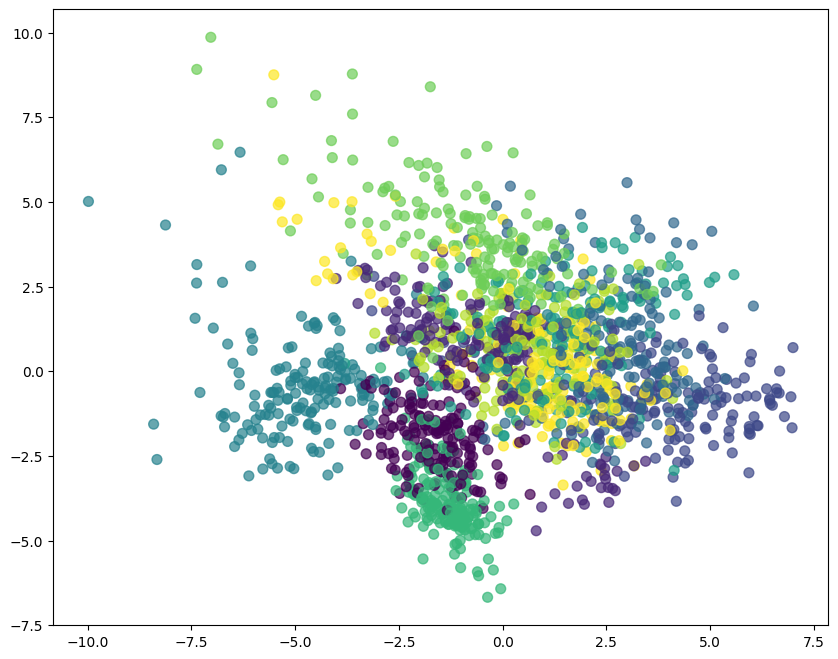

In [35]:
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)

4. Suddividi il dataset originale in set di training e test.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

5. Addestra un modello di classificazione (ad esempio, LogisticRegression o SVC) sui dati originali e calcola l'accuratezza sul test set.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9722222222222222


6. Ripeti l'addestramento del modello utilizzando i dati ridotti con PCA e confronta le
prestazioni.

In [45]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [52]:
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(X_test_pca)

In [53]:
print("Accuracy:",accuracy_score(y_test_pca, y_pred_pca))

Accuracy: 0.5388888888888889


7. Analizza come la riduzione della dimensionalità influisce sulla capacità del modello di
classificare correttamente le cifre.